In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import preprocess
import augmentations


df = pd.read_csv('combinedData.csv')
df = df.dropna()
df = df.drop_duplicates()
df = df.rename(columns={'sentence':'Sentences', 'label':'Labels'})

X = df['Sentences'].astype(str)
X = X.apply(preprocess.preprocess_df)
y = df['Labels'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(df['Sentences'])
y = df['Labels']

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=10, random_state=42)
    gbc.fit(X_train, y_train)
    
    y_pred = gbc.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy scores for each fold:", accuracy_scores)
print(f"Mean accuracy: {np.mean(accuracy_scores):.2f}")


Accuracy scores for each fold: [0.9415911379657603, 0.9541792547834844, 0.9496475327291037, 0.9602015113350126, 0.944080604534005]
Mean accuracy: 0.95


In [15]:
y_pred = gbc.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 214   24    9]
 [   5 1189   19]
 [   1   53  471]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       247
           1       0.94      0.98      0.96      1213
           2       0.94      0.90      0.92       525

    accuracy                           0.94      1985
   macro avg       0.95      0.91      0.93      1985
weighted avg       0.94      0.94      0.94      1985


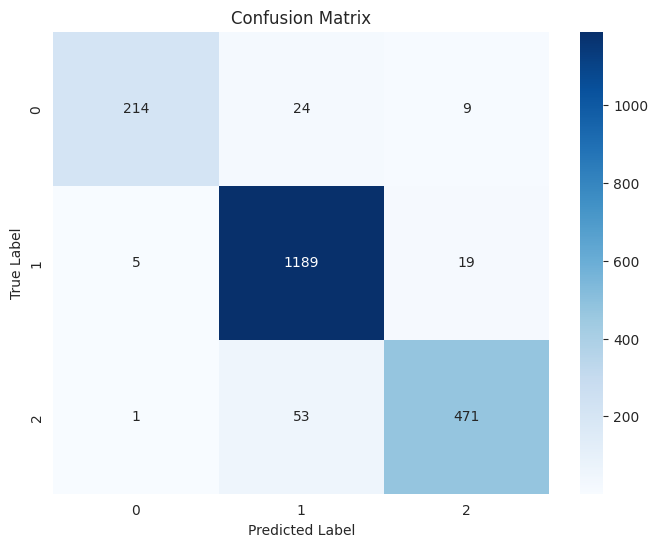

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [17]:
joblib.dump(gbc, 'final_gradient_boosting_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [18]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable
